In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 91% 149M/163M [00:01<00:00, 137MB/s]
100% 163M/163M [00:01<00:00, 146MB/s]


In [5]:
#Extract the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The data is extracted successfully")

The data is extracted successfully


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_885.jpg', 'with_mask_121.jpg', 'with_mask_2656.jpg', 'with_mask_566.jpg', 'with_mask_3479.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_1263.jpg', 'without_mask_40.jpg', 'without_mask_87.jpg', 'without_mask_3680.jpg', 'without_mask_3131.jpg']


In [9]:
print('The number of with mask images : ', len(with_mask_files))
print('The number of without mask images: ', len(without_mask_files))

The number of with mask images :  3725
The number of without mask images:  3828


**Creating the labels for image classes**

with mask as 1

without mask as 0

In [12]:
#Create the labels
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels= [0]*len(without_mask_files)

In [13]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


**Display the images**

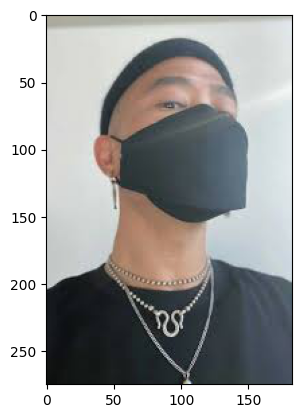

In [16]:
#Display the with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_815.jpg')
imgplot = plt.imshow(img)
plt.show()

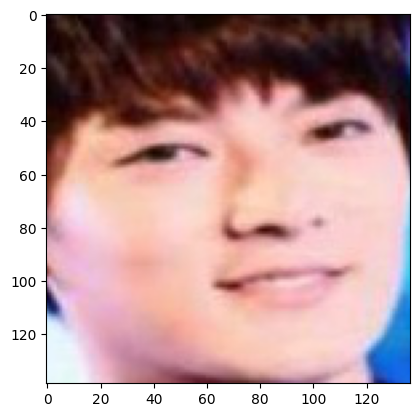

In [17]:
#Display the without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_25.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the image
2. Convert the image to numpy arrays

In [20]:
#Convert the images to numpy arrays

with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

data= []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


In [21]:
type(data)

list

In [22]:
len(data)

7553

In [23]:
data[0]

array([[[ 47,  59,  53],
        [ 47,  60,  53],
        [ 49,  61,  55],
        ...,
        [227, 232, 229],
        [235, 240, 236],
        [236, 243, 237]],

       [[ 53,  69,  62],
        [ 54,  70,  62],
        [ 52,  68,  60],
        ...,
        [232, 238, 234],
        [238, 243, 239],
        [238, 245, 241]],

       [[ 66,  87,  80],
        [ 65,  85,  78],
        [ 60,  81,  74],
        ...,
        [235, 244, 239],
        [236, 245, 240],
        [238, 246, 242]],

       ...,

       [[ 80,  83, 100],
        [145, 151, 164],
        [137, 140, 148],
        ...,
        [ 56, 119, 145],
        [ 58, 123, 150],
        [ 60, 122, 148]],

       [[114, 117, 130],
        [164, 171, 180],
        [143, 145, 152],
        ...,
        [ 49, 109, 141],
        [ 50, 115, 145],
        [ 53, 120, 152]],

       [[148, 147, 157],
        [181, 184, 191],
        [165, 163, 169],
        ...,
        [ 45, 100, 137],
        [ 44, 105, 140],
        [ 43, 109, 145]]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
#Converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [27]:
type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


**Train and Test split**

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)


In [34]:
print(X.shape , X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [35]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [36]:
print(X_train[0])

[[[247 241 243]
  [246 240 242]
  [245 239 241]
  ...
  [210 208 211]
  [208 206 209]
  [207 206 208]]

 [[247 241 243]
  [247 241 243]
  [246 240 242]
  ...
  [210 208 211]
  [208 206 209]
  [207 206 208]]

 [[248 242 244]
  [248 242 244]
  [247 241 243]
  ...
  [210 208 211]
  [208 206 209]
  [207 206 208]]

 ...

 [[252 253 243]
  [254 253 242]
  [255 252 240]
  ...
  [120  85  69]
  [122  88  73]
  [117  87  72]]

 [[251 253 242]
  [252 252 240]
  [255 251 239]
  ...
  [127  86  66]
  [123  80  61]
  [120  82  62]]

 [[253 252 237]
  [254 250 237]
  [255 250 238]
  ...
  [132  87  66]
  [128  84  64]
  [123  81  62]]]


In [37]:
print(X_train_scaled[0])

[[[0.96862745 0.94509804 0.95294118]
  [0.96470588 0.94117647 0.94901961]
  [0.96078431 0.9372549  0.94509804]
  ...
  [0.82352941 0.81568627 0.82745098]
  [0.81568627 0.80784314 0.81960784]
  [0.81176471 0.80784314 0.81568627]]

 [[0.96862745 0.94509804 0.95294118]
  [0.96862745 0.94509804 0.95294118]
  [0.96470588 0.94117647 0.94901961]
  ...
  [0.82352941 0.81568627 0.82745098]
  [0.81568627 0.80784314 0.81960784]
  [0.81176471 0.80784314 0.81568627]]

 [[0.97254902 0.94901961 0.95686275]
  [0.97254902 0.94901961 0.95686275]
  [0.96862745 0.94509804 0.95294118]
  ...
  [0.82352941 0.81568627 0.82745098]
  [0.81568627 0.80784314 0.81960784]
  [0.81176471 0.80784314 0.81568627]]

 ...

 [[0.98823529 0.99215686 0.95294118]
  [0.99607843 0.99215686 0.94901961]
  [1.         0.98823529 0.94117647]
  ...
  [0.47058824 0.33333333 0.27058824]
  [0.47843137 0.34509804 0.28627451]
  [0.45882353 0.34117647 0.28235294]]

 [[0.98431373 0.99215686 0.94901961]
  [0.98823529 0.98823529 0.94117647]


**Building a Convolutional Neural Network**

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [40]:
#Compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [68]:
#Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=6)

Epoch 1/6
 31/170 [====>.........................] - ETA: 1:51 - loss: 0.0651 - acc: 0.9748

KeyboardInterrupt: ignored

**Model Evaluation**

In [65]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 220ms/step - loss: 0.2951 - acc: 0.9179
Test Accuracy = 0.9179351329803467


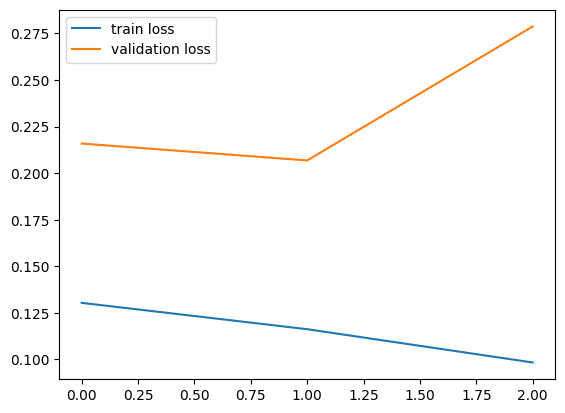

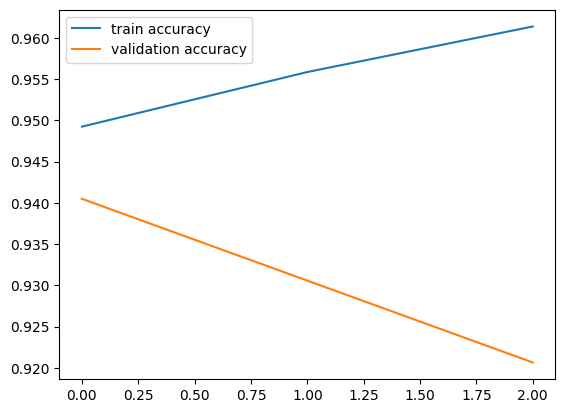

In [66]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/WP-2544.jpg


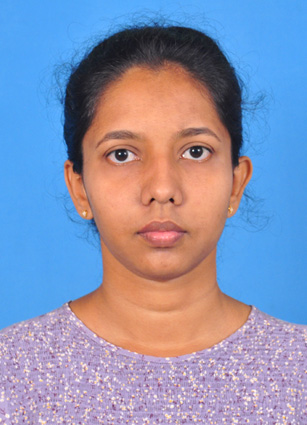

1/1 [==============================] - 0s 33ms/step
[[0.07681601 0.9374913 ]]
1
The person in the image is wearing a mask


In [67]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/WP-2544.jpg


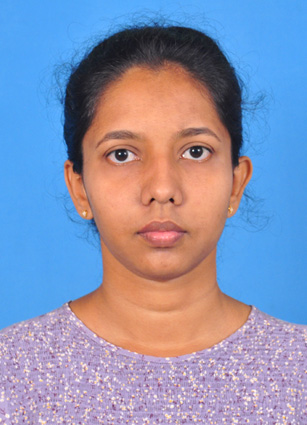

1/1 [==============================] - 0s 42ms/step
[[0.16128565 0.7725643 ]]
1
The person in the image is wearing a mask


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')